In [167]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [168]:
df = pd.read_csv("fcc-forum-pageviews.csv")

In [169]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [171]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [172]:
lower_bound = df["value"].quantile(0.025)  # Percentil 2.5%
upper_bound = df["value"].quantile(0.975)  # Percentil 97.5%

In [173]:
df = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


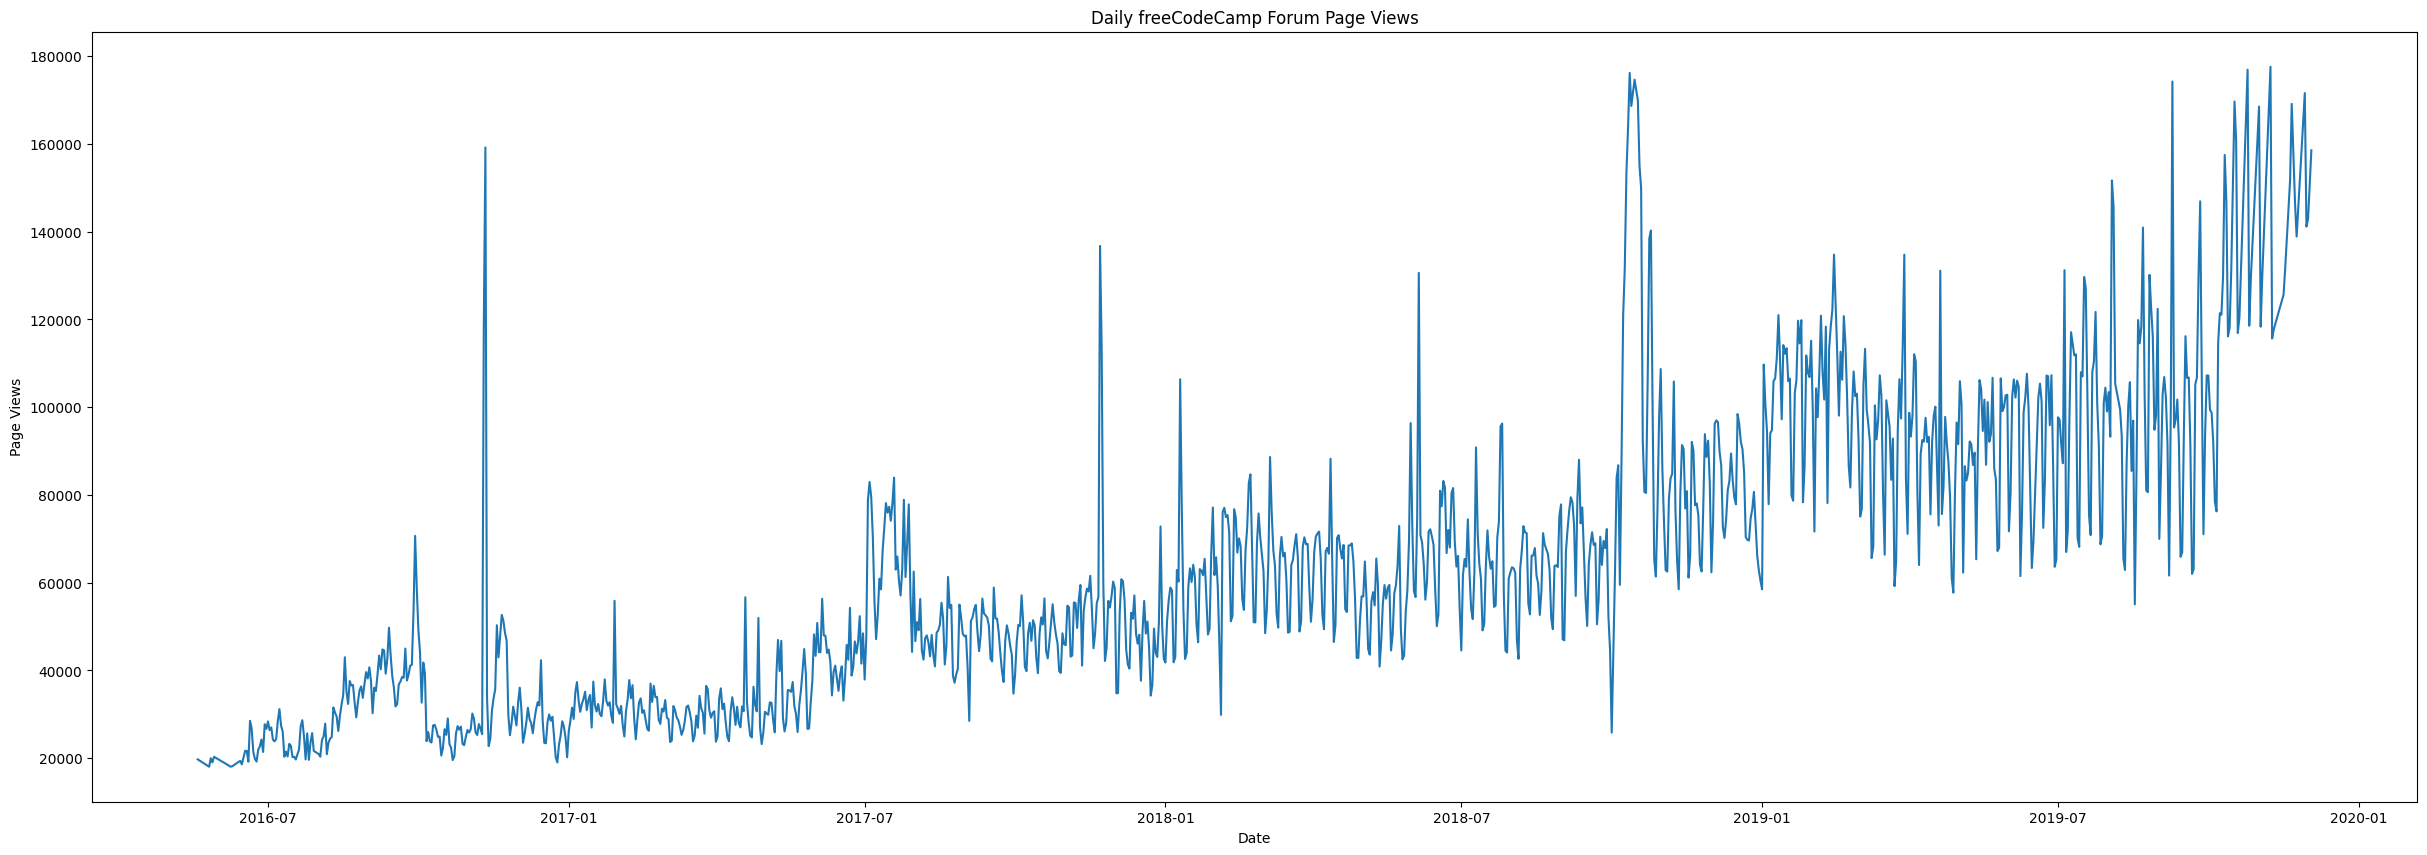

In [184]:
fig, ax = plot.subplots(figsize = (30,10))
sns.lineplot(ax = ax,data = df,x="date",y="value")

ax.set_title("Daily freeCodeCamp Forum Page Views")
ax.set_ylabel("Page Views")  
ax.set_xlabel("Date")


# Guardar la imagen en formato PNG
fig.savefig("Grafica de lineas")


In [189]:
df.loc[:, "date"] = pd.to_datetime(df["date"])


In [190]:
df.loc[:, "Month"] = df["date"].dt.month
df.loc[:, "Day"] = df["date"].dt.day
df.loc[:, "Year"] = df["date"].dt.year
df

,date,value,Month,Day,Year
10,2016-05-19,19736,5,19,2016
17,2016-05-26,18060,5,26,2016
18,2016-05-27,19997,5,27,2016
19,2016-05-28,19044,5,28,2016
20,2016-05-29,20325,5,29,2016
...,...,...,...,...,...
1294,2019-11-24,138875,11,24,2019
1299,2019-11-29,171584,11,29,2019
1300,2019-11-30,141161,11,30,2019
1301,2019-12-01,142918,12,1,2019


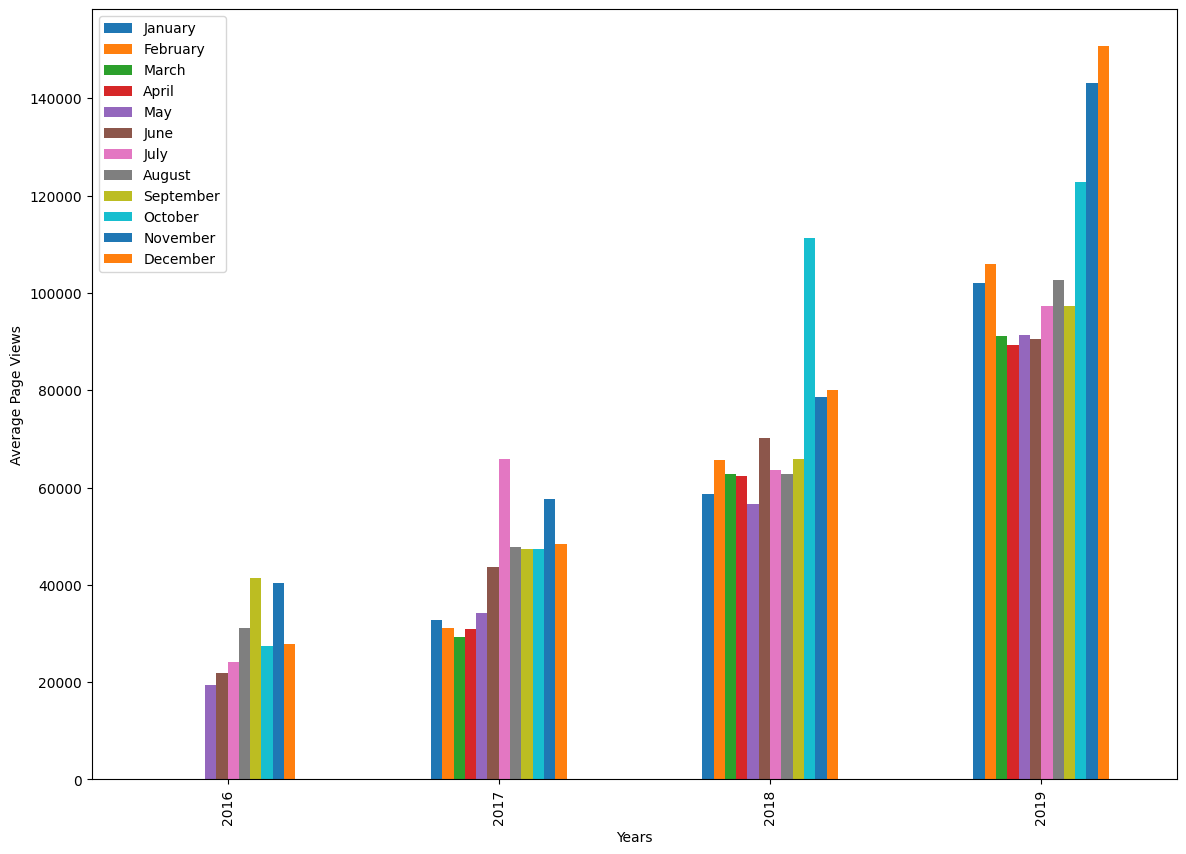

In [192]:
df_avg = df.groupby(["Year", "Month"])["value"].mean().reset_index()
df_pivot = df_avg.pivot(index="Year", columns="Month", values="value")

ax = df_pivot.plot(kind="bar", figsize=(14, 10))  # Crear el gráfico

# Configurar etiquetas y leyenda
plot.ylabel("Average Page Views")
plot.xlabel("Years")
plot.legend(["January", "February", "March", "April", "May", "June", "July", 
            "August", "September", "October", "November", "December"])

# Guardar la imagen
plot.savefig("page_views_barplot.png", dpi=300, bbox_inches="tight")

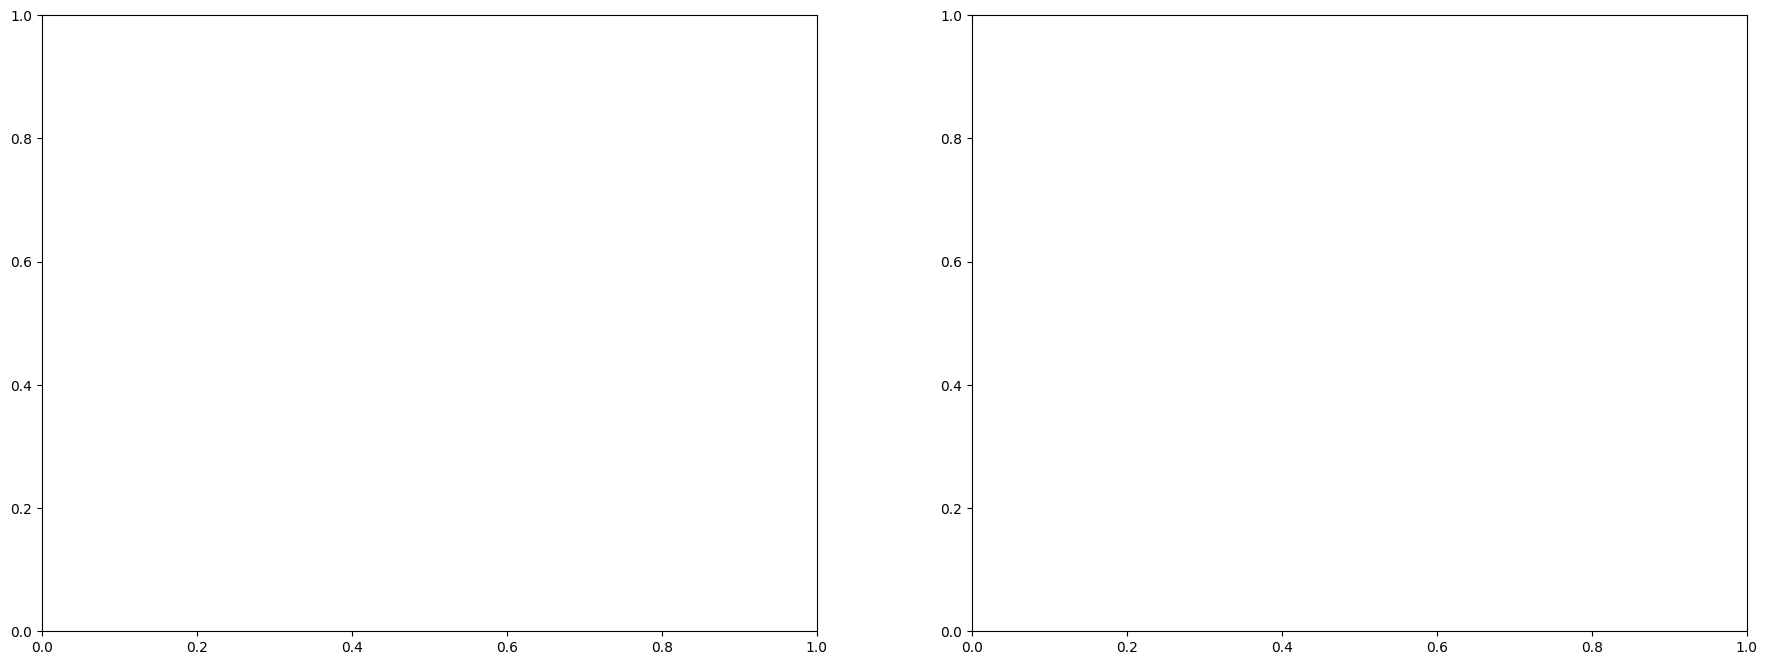

In [178]:
fig,axes = plot.subplots(1,2,figsize=(22,8))

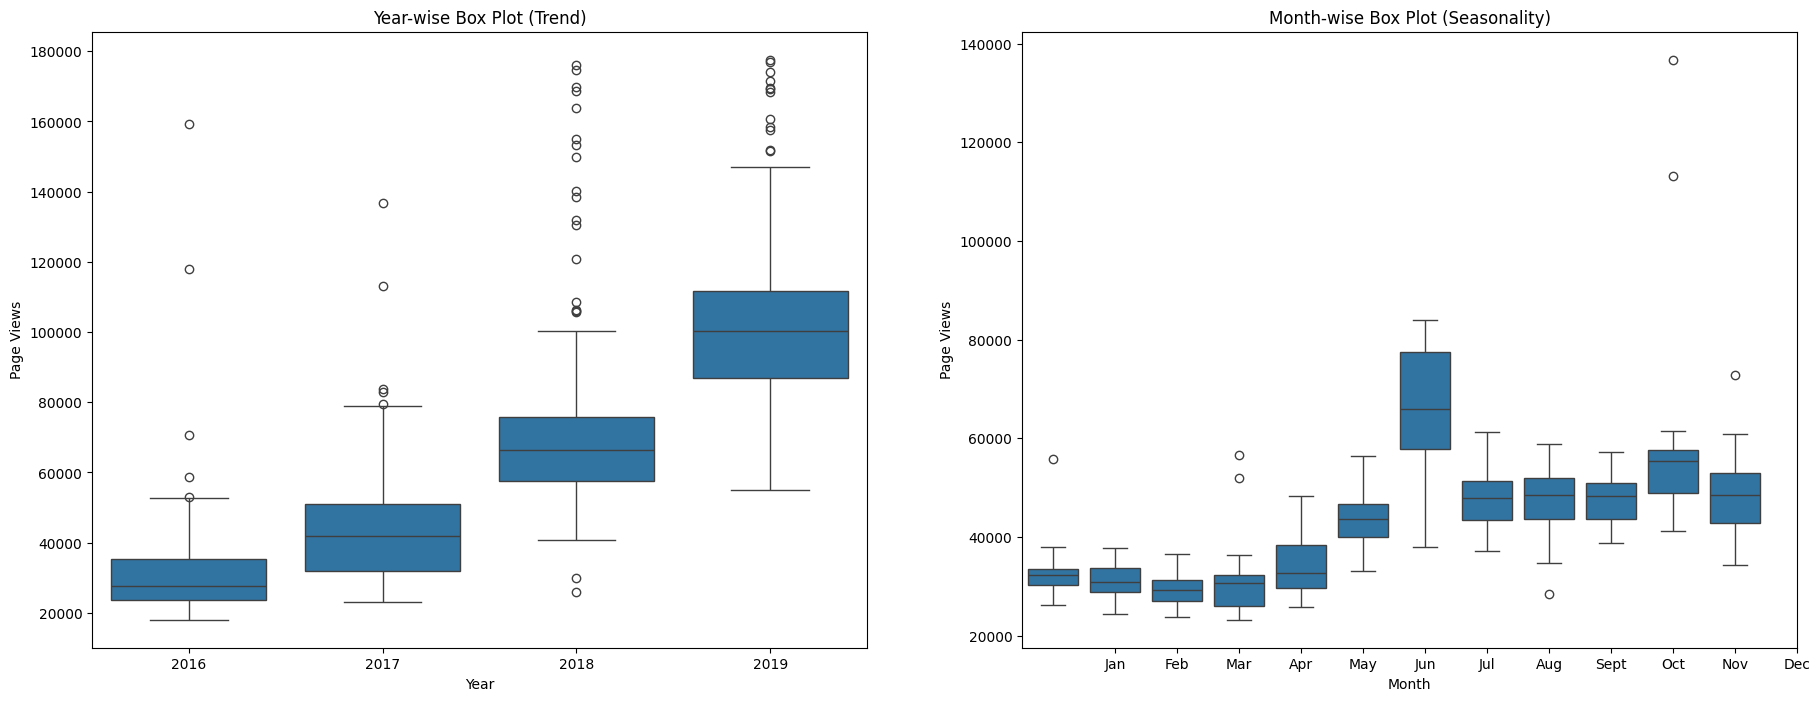

In [179]:
data_year_avg = df.groupby(["Year"])["value"].mean().reset_index()
sns.boxplot(ax = axes[0],data = df,x="Year",y="value")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_ylabel("Page Views")  
cond = df.loc[df["Year"] == 2017]
sns.boxplot(ax = axes[1],data = cond,x="Month",y="value")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xticks(range(1, 13))  
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
axes[1].set_ylabel("Page Views") 
fig.savefig("Practica3Img3")

In [180]:
df_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [181]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    44 non-null     int32  
 1   Month   44 non-null     int32  
 2   value   44 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 836.0 bytes
